<a href="https://colab.research.google.com/github/Kevincruz2019/tfm/blob/main/tratamiento_data_tweeter.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# An√°lisis de interacci√≥n con datos extra√≠do desde la cuenta oficial del Instituto Superior Tecnol√≥gico Guayaquil, red Social Twitter. 

**Objetivos**


1.   Preparar los datos en un formato adecuado para el entrenamiento del modelo. Aseg√∫randonos de tener una columna que represente la variable objetivo (cantidad de likes o retweets) y las caracter√≠sticas relevantes (fecha de publicaci√≥n, Seguidores, menciones) en columnas separadas.


2.   Dividir los datos en un conjunto de entrenamiento y un conjunto de prueba utilizando la funci√≥n train_test_split de scikit-learn. Esto te permitir√° evaluar el rendimiento del modelo en datos no vistos.


5.   Eligir un modelo de aprendizaje autom√°tico adecuado para esta actividad. 


6.   Ajustar el modelo a los datos de entrenamiento utilizando la funci√≥n fit del modelo seleccionado. Proporciona las caracter√≠sticas y la variable objetivo correspondiente para entrenar el modelo.




7.  Utilizando t√©cnicas de aprendizaje autom√°tico, construir modelos predictivos para estimar la cantidad de likes o retweets que podr√≠a recibir una publicaci√≥n en funci√≥n de caracter√≠sticas como la fecha de publicaci√≥n, seguidores o menciones. Tambien conocer mediante este modelo si una publicaci√≥n podr√≠a llegar a ser exitosa o no. Esto te permitir√° prever el impacto potencial de una publicaci√≥n antes de compartirla.

8.   Eval√∫ar el rendimiento del modelo utilizando m√©tricas apropiadas. 





En esta parte se esta importando varias librer√≠as de Python relacionadas con el an√°lisis de datos y el aprendizaje autom√°tico (machine learning). A continuaci√≥n, te explicar√© brevemente qu√© hace cada una de estas librer√≠as y por qu√© podr√≠as usarlas en tu c√≥digo:

**pandas:** Es una librer√≠a muy popular para el an√°lisis de datos en Python. Proporciona estructuras de datos flexibles y eficientes para trabajar con conjuntos de datos tabulares, como dataframes. Permite cargar datos desde diferentes fuentes, realizar transformaciones y manipulaciones de datos, y realizar operaciones estad√≠sticas.

**numpy:** Es una librer√≠a fundamental para el c√°lculo num√©rico en Python. Proporciona una amplia gama de funciones y herramientas para trabajar con matrices y realizar operaciones matem√°ticas eficientes. Es particularmente √∫til para el procesamiento y an√°lisis de datos num√©ricos.

**seaborn:** Es una librer√≠a de visualizaci√≥n de datos basada en Matplotlib. Proporciona una interfaz de alto nivel para crear gr√°ficos estad√≠sticos atractivos y visualmente informativos. Seaborn ofrece una variedad de funciones para crear r√°pidamente gr√°ficos de barras, diagramas de dispersi√≥n, gr√°ficos de cajas, mapas de calor y m√°s.

**matplotlib.pyplot:** Es una librer√≠a ampliamente utilizada para crear visualizaciones en Python. Proporciona una interfaz similar a la de MATLAB y se utiliza principalmente para generar gr√°ficos est√°ticos, como gr√°ficos de l√≠neas, de dispersi√≥n, de barras, histogramas, entre otros.

**sklearn.linear_model.LogisticRegression:** Es una clase de la librer√≠a scikit-learn (sklearn) que implementa el algoritmo de regresi√≥n log√≠stica. La regresi√≥n log√≠stica es un m√©todo de clasificaci√≥n utilizado para predecir la probabilidad de que una instancia pertenezca a una clase en particular.

**sklearn.model_selection.train_test_split:** Es una funci√≥n de scikit-learn que se utiliza para dividir un conjunto de datos en conjuntos de entrenamiento y prueba. Esto es √∫til para evaluar el rendimiento de un modelo de aprendizaje autom√°tico, ya que permite entrenar el modelo en un conjunto de datos y luego evaluarlo en datos no vistos.

**sklearn.metrics:** Es un m√≥dulo de scikit-learn que proporciona m√©tricas de evaluaci√≥n para evaluar el rendimiento de modelos de aprendizaje autom√°tico. Las m√©tricas incluyen la precisi√≥n (accuracy), el recall, el R2 score, entre otros.

**scipy.stats.spearmanr:** Es una funci√≥n de la librer√≠a SciPy que calcula el coeficiente de correlaci√≥n de Spearman entre dos variables. Este coeficiente mide la relaci√≥n monot√≥nica entre las variables, lo cual es √∫til para analizar relaciones no lineales.

**sklearn.tree.DecisionTreeClassifier:** Es una clase de scikit-learn que implementa el algoritmo de √°rbol de decisiones para la clasificaci√≥n. Los √°rboles de decisiones son un m√©todo de aprendizaje supervisado que se utiliza para clasificar instancias en diferentes clases utilizando reglas de decisi√≥n basadas en caracter√≠sticas.

**sklearn.tree.plot_tree:** Es una funci√≥n de scikit-learn que se utiliza para visualizar el √°rbol de decisiones generado por un modelo entrenado. Esta funci√≥n permite ver

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, recall_score, r2_score
from scipy.stats import spearmanr
from sklearn.tree import DecisionTreeClassifier, plot_tree

Despu√©s de ejecutar esta l√≠nea de c√≥digo, los datos del archivo CSV se cargar√°n en el DataFrame 'data', y se podr√° utilizar para realizar operaciones y an√°lisis.

In [3]:
# Cargar los datos desde el archivo CSV
data = pd.read_csv('datos_twitter.csv', encoding= 'Utf-8')

Al ejecutar data.head(10), se esta solicitando visualizar las primeras 10 filas de los datos cargados en el DataFrame data. 

In [4]:
data.head(10)

Fecha                                              Texto  Longitud  \
0  14/5/2023  Hoy se llev√≥ a cabo la posesi√≥n del nuevo¬†alca...       271   
1  13/5/2023  En el campus Guayaquil y en el Campus CMI cele...       263   
2  11/5/2023  Hoy tuvimos la socializaci√≥n con la participac...       247   
3  11/5/2023  Te invitamos a la rendici√≥n de cuentas 2022 üö®\...       162   
4  11/5/2023  Levante la mano quien se siente feliz al conoc...       158   
5  10/5/2023  ¬°Cont√°ctate con nosotros! Te dejamos los corre...       142   
6  10/5/2023  La Gestor√≠a de Arte y Cultura tiene diferentes...       297   
7  10/5/2023  RT @istg_ec: üëâ NivelTEC ampli√≥ sus inscripcion...       140   
8   9/5/2023  üëâ NivelTEC ampli√≥ sus inscripciones üëà\n\nParti...       301   
9   9/5/2023  üëâ NivelTEC ampli√≥ sus inscripciones üëà\n\nParti...       301   

   Likes  Retweets  Seguidores  Menciones  Hashtags  
0     15         6         NaN        NaN       NaN  
1     16         6         NaN        NaN       NaN  
2      5         5         NaN        NaN       NaN  
3     12         8         NaN        NaN       NaN  
4      8         5         NaN        NaN       NaN  
5      4         5         NaN        NaN       NaN  
6      6         6         NaN        NaN       NaN  
7      0         8         NaN        NaN       NaN  
8      9         8         NaN        NaN       NaN  
9      6         2         NaN        NaN       NaN

Al ejecutar print(data.shape), vamos a obtener  la forma (shape) de los datos cargados en el DataFrame data. La forma de un DataFrame en pandas es una tupla que indica el n√∫mero de filas y columnas presentes en el DataFrame, lo utilizamos para conocer cuantas filas y columnas tienen nuestro registro.

In [5]:
# Columnas Vs Filas
print(data.shape)

(9711, 8)


Inspeccionamos inicialmente los tipos de datos

In [6]:
# Obtener los tipos de datos de las columnas
tipos_datos = data.dtypes.reset_index()
tipos_datos.columns = ['Columna', 'Tipo de Dato']

# Crear el estilo de la tabla
estilo_tabla = tipos_datos.style \
    .set_table_styles([
        {'selector': 'th', 'props': [('border', '1px solid black')]}
    ]) \

# Imprimir la tabla de tipos de datos con estilo
print('Tipos de Datos de las Columnas')
display(estilo_tabla)

Tipos de Datos de las Columnas


# **An√°lisis de datos faltantes**

 Se est√° generando un mapa de calor (heatmap) utilizando la biblioteca Seaborn en Python. El objetivo es visualizar los valores faltantes en las primeras 10 columnas del dataframe llamado 'data'.

<Axes: >

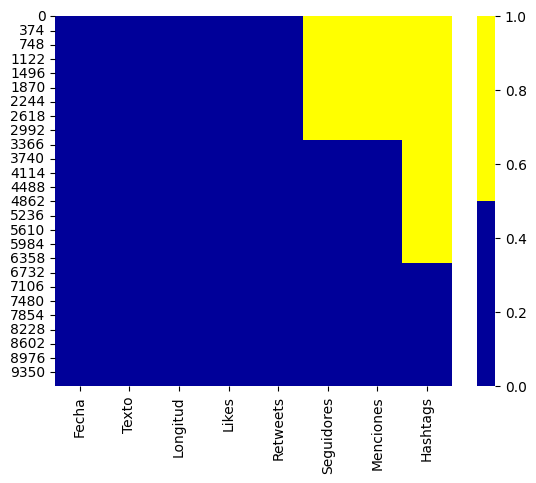

In [7]:
cols = data.columns[:10] 
colours = ['#000099', '#ffff00'] # specify the colours - yellow is missing. blue is not missing.
sns.heatmap(data[cols].isnull(), cmap=sns.color_palette(colours))

Se calcula el porcentaje de valores faltantes para cada atributo de entrada en el dataframe 'data'. Luego, se imprime una tabla que muestra el nombre del atributo y el porcentaje de valores faltantes correspondiente.

In [8]:
# Porcentaje de los valores faltantes por atributo de entrada
for col in data.columns:
    pct_missing = np.mean(data[col].isnull())
    print('| {:<20} | {:>6.2f}% |'.format(col, round(pct_missing*100, 2)))

# Imprimir l√≠nea de separaci√≥n
print('-' * 31)

| Fecha                |   0.00% |
| Texto                |   0.00% |
| Longitud             |   0.00% |
| Likes                |   0.00% |
| Retweets             |   0.00% |
| Seguidores           |  33.33% |
| Menciones            |  33.33% |
| Hashtags             |  66.67% |
-------------------------------


Se elimina la columna "Hashtags" del dataframe 'data' utilizando el m√©todo "drop()".La decisi√≥n de eliminar la columna "Hashtags" del conjunto de datos se basa en el hecho de que presenta un alto porcentaje de datos faltantes, alcanzando un 66.67%. Los datos faltantes en una columna pueden afectar negativamente el an√°lisis y los resultados obtenidos, ya que la falta de informaci√≥n puede introducir sesgos o distorsionar la interpretaci√≥n de los resultados.


In [9]:
# Eliminar la columna "columna_eliminar"
data = data.drop("Hashtags", axis=1)

In [10]:
print(data.columns)

Index(['Fecha', 'Texto', 'Longitud', 'Likes', 'Retweets', 'Seguidores',
       'Menciones'],
      dtype='object')


En este paso del an√°lisis de datos, se est√° imputando los valores faltantes de las columnas "Seguidores" y "Menciones" utilizando la media de los valores existentes en cada columna. Este proceso se realiza para abordar el problema de los datos faltantes y garantizar que todas las filas tengan valores v√°lidos en estas variables.

La imputaci√≥n de los valores faltantes con la media es una t√©cnica com√∫nmente utilizada cuando los datos faltantes son num√©ricos. Se elige la media como medida central para reemplazar los valores faltantes, ya que proporciona una estimaci√≥n razonable basada en la distribuci√≥n existente de los datos.

Al imputar los valores faltantes con la media, se busca preservar la estructura y las caracter√≠sticas generales del conjunto de datos, evitando distorsiones o sesgos significativos que podr√≠an surgir de otros m√©todos de imputaci√≥n. Esta estrategia tambi√©n permite mantener el tama√±o y la integridad del conjunto de datos original.

In [11]:
# Imputar los valores faltantes de las columnas con la media
data["Seguidores"] = data["Seguidores"].fillna(data["Seguidores"].mean())
data["Menciones"] = data["Menciones"].fillna(data["Menciones"].mean())

En base al resultado obtenido al generar un mapa de calor de los valores faltantes en las primeras 10 columnas del conjunto de datos, se puede observar que ya no hay datos vac√≠os presentes. El mapa de calor muestra visualmente la presencia o ausencia de valores faltantes en cada columna, donde el color amarillo indica la ausencia de datos y el color azul indica la presencia de datos.

<Axes: >

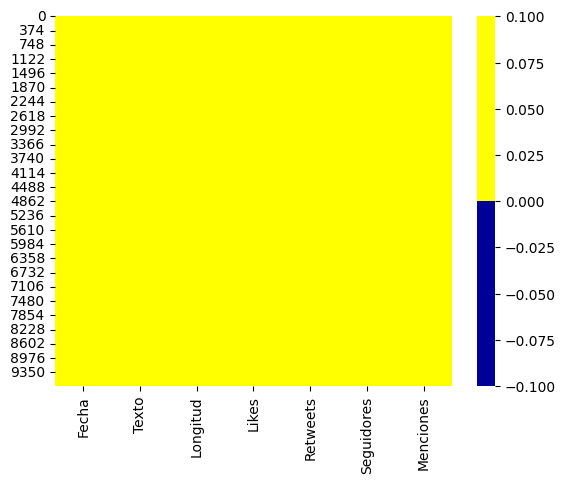

In [12]:
cols = data.columns[:10] # first 30 columns
colours = ['#000099', '#ffff00'] # specify the colours - yellow is missing. blue is not missing.
sns.heatmap(data[cols].isnull(), cmap=sns.color_palette(colours))

En base al c√°lculo del porcentaje de valores faltantes por atributo de entrada en el conjunto de datos, se puede observar que ya no existen datos vac√≠os. Cada columna ha sido evaluada y se ha determinado el porcentaje de valores faltantes en relaci√≥n al total de registros.

In [13]:
# Porcentaje de los valores faltantes por atributo de entrada
for col in data.columns:
    pct_missing = np.mean(data[col].isnull())
    print('| {:<20} | {:>6.2f}% |'.format(col, round(pct_missing*100, 2)))

# Imprimir l√≠nea de separaci√≥n
print('-' * 31)

| Fecha                |   0.00% |
| Texto                |   0.00% |
| Longitud             |   0.00% |
| Likes                |   0.00% |
| Retweets             |   0.00% |
| Seguidores           |   0.00% |
| Menciones            |   0.00% |
-------------------------------


La creaci√≥n de la variable objetivo "Interaccion" en el conjunto de datos es un paso fundamental en este estudio. Esta variable se obtiene sumando los valores de las columnas "Likes" y "Retweets", lo cual permite cuantificar la interacci√≥n de los usuarios con las publicaciones del instituto en Twitter.

La inclusi√≥n de esta variable objetivo es relevante para analizar y evaluar el nivel de participaci√≥n y el inter√©s de los usuarios en las publicaciones. Al combinar las m√©tricas de "Likes" y "Retweets", se obtiene una medida integral de la interacci√≥n, capturando tanto la respuesta positiva de los usuarios (a trav√©s de los "Likes") como su voluntad de compartir la publicaci√≥n con su propia audiencia (mediante los "Retweets").

In [14]:
data['Interaccion'] = data['Likes'] + data['Retweets']

Se procedi√≥ a calcular la matriz de correlaci√≥n utilizando el m√©todo de Spearman en el conjunto de datos. Este enfoque es especialmente √∫til cuando se trata de analizar relaciones no lineales o cuando las variables no siguen una distribuci√≥n normal.

Al examinar la matriz de correlaci√≥n de Spearman, se observa que las variables "Retweets" y "Likes" muestran una correlaci√≥n m√°s fuerte con la variable objetivo "Interaccion" en comparaci√≥n con otras variables del conjunto de datos. Esta correlaci√≥n positiva indica que a medida que aumentan los valores de "Retweets" y "Likes", tambi√©n tiende a aumentar la cantidad de interacci√≥n de los usuarios con las publicaciones del instituto en Twitter.

Estos hallazgos son consistentes con la intuici√≥n, ya que es de esperar que las publicaciones que generen m√°s retweets y likes tambi√©n generen una mayor interacci√≥n por parte de los usuarios. Esta correlaci√≥n positiva sugiere que estas dos variables pueden desempe√±ar un papel importante en la predicci√≥n o estimaci√≥n de la interacci√≥n de los usuarios en futuras publicaciones.

In [15]:
# Calcular la matriz de correlaci√≥n de Spearman
corr_matrix = data.corr(method='spearman')

<ipython-input-15-e8f4f97dd829>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = data.corr(method='spearman')


<Axes: >

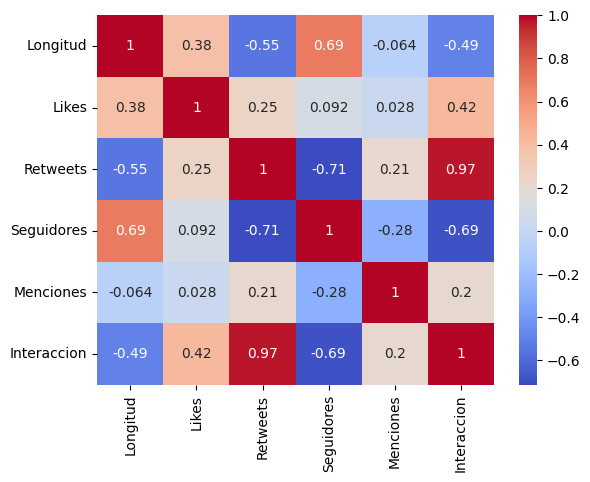

In [16]:
# Generar un gr√°fico de correlaci√≥n utilizando el mapa de calor de Seaborn
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')


In [17]:
# Obtener los valores de correlaci√≥n con la variable objetivo y ordenarlos de forma descendente
correlation_with_target = corr_matrix['Interaccion'].drop('Interaccion').sort_values(ascending=False)

# Imprimir los valores de correlaci√≥n con la variable objetivo
print(correlation_with_target)

# Mostrar el gr√°fico de correlaci√≥n
plt.show()

Retweets      0.967952
Likes         0.419415
Menciones     0.204240
Longitud     -0.494631
Seguidores   -0.691041
Name: Interaccion, dtype: float64


Se realiz√≥ un an√°lisis para determinar la fecha con mayor importancia en t√©rminos de interacci√≥n de los usuarios. Utilizando la funci√≥n "idxmax()" en la columna "Interaccion" del conjunto de datos, se identific√≥ el √≠ndice del registro que tiene el valor m√°ximo de interacci√≥n.

Posteriormente, se accedi√≥ a la columna "Fecha" correspondiente a dicho √≠ndice utilizando la funci√≥n "loc[]" para obtener la fecha asociada a la m√°xima importancia en t√©rminos de interacci√≥n de los usuarios.

La variable "fecha_max_importancia" contiene ahora la fecha con mayor importancia en base a la interacci√≥n de los usuarios. Este resultado puede ser de relevancia para comprender qu√© publicaciones o eventos espec√≠ficos generaron una mayor participaci√≥n y respuesta por parte de los usuarios en el contexto del an√°lisis realizado.

In [18]:
# Obtener la fecha con mayor importancia
fecha_max_importancia = data.loc[data['Interaccion'].idxmax(), 'Fecha']

In [19]:
# Imprimir los resultados
print(data)
print('Fecha con mayor interacci√≥n:', fecha_max_importancia)

          Fecha                                              Texto  Longitud  \
0     14/5/2023  Hoy se llev√≥ a cabo la posesi√≥n del nuevo¬†alca...       271   
1     13/5/2023  En el campus Guayaquil y en el Campus CMI cele...       263   
2     11/5/2023  Hoy tuvimos la socializaci√≥n con la participac...       247   
3     11/5/2023  Te invitamos a la rendici√≥n de cuentas 2022 üö®\...       162   
4     11/5/2023  Levante la mano quien se siente feliz al conoc...       158   
...         ...                                                ...       ...   
9706  10/6/2018  RT @EduSuperiorEc: La Senescyt es el centro au...       140   
9707   9/6/2018  Gracias Vicentg96 por seguirnos! https://t.co/...        56   
9708   8/6/2018  Reuni√≥n de vinculaci√≥n con el Ing. Rolando Roj...       206   
9709   8/6/2018  Gracias Alejando Jimenez por seguirnos! https:...        63   
9710   8/6/2018  RT @vallovig: Tutorial C√≥mo aplicar a Banco d ...       140   

      Likes  Retweets   Segu

In [20]:
# Obtener las 10 fechas con mayor interacci√≥n
top_10_fechas = data.nlargest(10, 'Interaccion')['Fecha']
top_10_interacciones = data.nlargest(10, 'Interaccion')['Interaccion']
# Obtener una escala de colores en funci√≥n de los valores de interacci√≥n
colores = plt.cm.viridis(np.linspace(0, 1, len(top_10_interacciones)))



Se realiz√≥ un gr√°fico de barras para visualizar las 10 fechas con mayor interacci√≥n en base a los datos analizados. Se utiliz√≥ una lista de colores comunes, que incluye 'red', 'blue', 'green', 'yellow', 'purple', 'black', 'brown', 'orange', 'pink' y 'gray', para colorear las barras correspondientes a cada fecha.

El eje x del gr√°fico representa las fechas y el eje y representa las interacciones. Cada barra muestra la cantidad de interacciones para cada fecha. El t√≠tulo del gr√°fico es "Top 10 Fechas con Mayor Interacci√≥n". Adem√°s, se rotaron los valores en el eje x en 45 grados para facilitar la lectura de las fechas.

Para proporcionar mayor precisi√≥n, se agregaron etiquetas en cada barra que muestran el valor exacto de interacciones correspondiente a cada fecha. Cada etiqueta est√° alineada al centro de la barra y ubicada en la parte superior de la misma, utilizando el color correspondiente de la lista de colores comunes.

Este gr√°fico permite identificar de manera visual las fechas con mayor interacci√≥n, lo que puede ser √∫til para comprender los momentos o eventos que generaron un mayor nivel de participaci√≥n de los usuarios en relaci√≥n a las publicaciones o actividades analizadas.

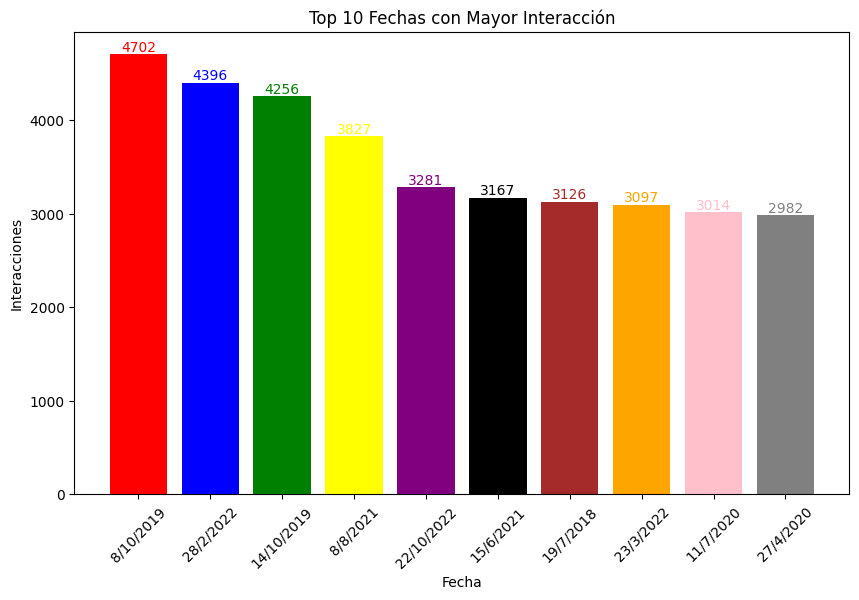

In [21]:
colores_comunes = ['red', 'blue', 'green', 'yellow', 'purple', 'black', 'brown', 'orange', 'pink', 'gray']

plt.figure(figsize=(10, 6))
plt.bar(top_10_fechas, top_10_interacciones, color=colores_comunes)
plt.xlabel('Fecha')
plt.ylabel('Interacciones')
plt.title('Top 10 Fechas con Mayor Interacci√≥n')
plt.xticks(rotation=45)

# Agregar los valores exactos en cada barra
for i, (valor, color) in enumerate(zip(top_10_interacciones, colores_comunes)):
    plt.text(top_10_fechas.iloc[i], valor, str(valor), ha='center', va='bottom', color=color)

plt.show()

In [22]:
# Obtener las 10 fechas con mayor interacci√≥n
top_10_fechas = data.nlargest(10, 'Interaccion')['Fecha']

# Filtrar las publicaciones correspondientes a las fechas seleccionadas
publicaciones_top_10 = data[data['Fecha'].isin(top_10_fechas)]['Texto']

# Imprimir las publicaciones
for fecha, publicacion in zip(top_10_fechas, publicaciones_top_10):
    print(f"Fecha: {fecha}")
    print(f"Publicaci√≥n: {publicacion}")
    print("--------------")

Fecha: 8/10/2019
Publicaci√≥n: RT @EduSuperiorEc: ¬øPostulaste por un cupo a la educaci√≥n superior? 

üëá 23 de octubre ser√° la fase de aceptaci√≥n üëá

1‚É£ Ingresa en: https://‚Ä¶
--------------
Fecha: 28/2/2022
Publicaci√≥n: Ya puedes inscribirte para rendir el examen de ubicaci√≥n de ingl√©s üßê. Te dejamos el link del formulario https://t.co/DPDb1BhitQ https://t.co/IWd5IOYano
--------------
Fecha: 14/10/2019
Publicaci√≥n: ¬°Un aplauso para Elias Franco! Es nuestro fan destacado por su constante interacci√≥n en nuestras redes sociales üëè‚ù§Ô∏è

#fan #interaccion #somosistg https://t.co/igy3BnWAI4
--------------
Fecha: 8/8/2021
Publicaci√≥n: Te contamos los documentos que que necesitas para la matriculaci√≥n ü§î.                                                      Debes estar atento al cronograma de matriculaci√≥n para que puedas matricularte correctamente. https://t.co/1aExtRZl3Q
--------------
Fecha: 22/10/2022
Publicaci√≥n: RT @daneyfemmejolie: Excelente evento donde tan

# **Modelo de regresi√≥n Log√≠stica**


En esta parte del c√≥digo, se realiza la divisi√≥n de los datos en caracter√≠sticas (features) y la variable objetivo.

Las caracter√≠sticas, representadas por la variable X, se seleccionan de la columna de datos que contiene los valores de "Retweets" y "Likes". Estas caracter√≠sticas se utilizan para predecir la variable objetivo.

La variable objetivo, representada por la variable y, se extrae de la columna de datos correspondiente a "Interaccion". Esta variable es la que se busca predecir o explicar a partir de las caracter√≠sticas seleccionadas.

Al dividir los datos en caracter√≠sticas y variable objetivo, se crea una estructura que permite utilizar las caracter√≠sticas para entrenar un modelo predictivo y luego evaluar su capacidad para predecir la variable objetivo. Esto es fundamental en el an√°lisis de datos y el desarrollo de modelos predictivos.

In [23]:
# Dividir los datos en caracter√≠sticas (features) y la variable objetivo
X = data[['Retweets','Likes']]  # Caracter√≠stica(s)
y = data['Interaccion']  # Variable objetivo

En este fragmento de c√≥digo se realiza la divisi√≥n de los datos en conjuntos de entrenamiento y prueba, y luego se crea y entrena el modelo de regresi√≥n log√≠stica.

La funci√≥n train_test_split del paquete sklearn.model_selection se utiliza para dividir los datos en conjuntos de entrenamiento y prueba. Los par√°metros X y y representan las caracter√≠sticas y la variable objetivo, respectivamente. Se utiliza el par√°metro test_size para especificar el tama√±o del conjunto de prueba, en este caso se ha establecido en 0.2, lo que significa que el 20% de los datos se utilizar√°n para prueba. El par√°metro random_state se utiliza para establecer una semilla aleatoria, lo que garantiza que la divisi√≥n de los datos sea reproducible.

Despu√©s de la divisi√≥n de los datos, se crea una instancia del modelo de regresi√≥n log√≠stica utilizando la clase LogisticRegression. Este modelo se asigna a la variable model.

A continuaci√≥n, se entrena el modelo utilizando el m√©todo fit(), que recibe como argumentos las caracter√≠sticas de entrenamiento (X_train) y la variable objetivo de entrenamiento (y_train). El modelo utiliza estos datos para aprender los patrones y ajustar sus par√°metros internos, de manera que pueda realizar predicciones precisas sobre la variable objetivo.


In [24]:
# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Convertir las columnas de fecha a representaci√≥n num√©rica

In [25]:
# Crear y entrenar el modelo de regresi√≥n log√≠stica
model = LogisticRegression()
model.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

En este fragmento de c√≥digo se realizan predicciones en el conjunto de prueba utilizando el modelo de regresi√≥n log√≠stica previamente entrenado.

El m√©todo predict() se utiliza para realizar las predicciones en base a las caracter√≠sticas de prueba (X_test). Las predicciones resultantes se almacenan en la variable y_pred.

Posteriormente, se eval√∫a la precisi√≥n del modelo utilizando el m√©todo score(). Este m√©todo calcula la precisi√≥n del modelo al comparar las predicciones realizadas (y_pred) con los valores reales de la variable objetivo de prueba (y_test). El valor de precisi√≥n obtenido se almacena en la variable accuracy.

In [26]:
# Realizar predicciones en el conjunto de prueba
y_pred = model.predict(X_test)

In [27]:
# Evaluar la precisi√≥n del modelo u otras m√©tricas de evaluaci√≥n
accuracy = model.score(X_test, y_test)
print("Precisi√≥n del modelo:", accuracy)

Precisi√≥n del modelo: 0.1152856407617087


Bas√°ndonos en el resultado obtenido de una precisi√≥n del 11% en la predicci√≥n de la variable objetivo en el conjunto de prueba, podemos concluir que el modelo de regresi√≥n log√≠stica utilizado no es efectivo para predecir las interacciones en base a las caracter√≠sticas de "Retweets" y "Likes".

Una precisi√≥n del 11% indica que el modelo tiene un rendimiento muy bajo y no logra capturar adecuadamente la relaci√≥n entre las variables predictoras y la variable objetivo. Esto puede deberse a diferentes factores, como la falta de correlaci√≥n significativa entre las variables de entrada y la variable objetivo, o la presencia de otros factores influyentes que no est√°n siendo considerados en el modelo.



# **Modelo de √°rbol de decisi√≥n**

En este paso, se realiza la divisi√≥n de los datos en caracter√≠sticas (features) y la variable objetivo.

En primer lugar, se asigna a la variable X todas las columnas del conjunto de datos original, excepto la columna 'Interaccion', ya que esa es nuestra variable objetivo. Esto se realiza utilizando el m√©todo drop y especificando el par√°metro axis=1 para indicar que se desea eliminar una columna.

A continuaci√≥n, se asigna a la variable y la columna 'Interaccion', que representa nuestra variable objetivo.

Adicionalmente, se convierte la columna 'Fecha' a una representaci√≥n num√©rica utilizando el m√©todo pd.to_numeric(). Esto es necesario si se desea implementar un modelo de √°rbol de decisi√≥n, ya que estos modelos requieren que todas las caracter√≠sticas sean num√©ricas.

Este proceso nos permite separar claramente las caracter√≠sticas de la variable objetivo, preparando los datos para su posterior entrenamiento y evaluaci√≥n de un modelo de √°rbol de decisi√≥n.

In [35]:
# Dividir los datos en caracter√≠sticas (features) y la variable objetivo
data['Fecha'] = pd.to_datetime(data['Fecha'])
X = data.drop(['Interaccion','Texto'], axis=1)  # Caracter√≠sticas (excluyendo la variable objetivo)
y = data['Interaccion']  # Variable objetivo


In [37]:
# Convertir las columnas de fecha a representaci√≥n num√©rica
X['Fecha'] = pd.to_numeric(X['Fecha'])


En este paso, se realiza la divisi√≥n de los datos en conjuntos de entrenamiento y prueba.

Utilizando la funci√≥n train_test_split del m√≥dulo sklearn.model_selection, se separa el conjunto de caracter√≠sticas X y la variable objetivo y en cuatro conjuntos diferentes: X_train, X_test, y_train y y_test.

El par√°metro test_size=0.2 indica que se desea asignar el 20% de los datos para el conjunto de prueba, mientras que el 80% restante se utilizar√° para el entrenamiento.

El par√°metro random_state=42 se utiliza para establecer una semilla y asegurar que la divisi√≥n de los datos sea reproducible.

Una vez divididos los datos, se crea y entrena el modelo de √°rbol de decisi√≥n utilizando la clase DecisionTreeClassifier del m√≥dulo sklearn.tree. El modelo se asigna a la variable model, y se entrena utilizando los conjuntos de entrenamiento X_train y y_train mediante el m√©todo fit().

Este paso nos permite tener conjuntos de datos separados para entrenar y evaluar el modelo de √°rbol de decisi√≥n, lo cual es esencial para medir su desempe√±o y capacidad de predicci√≥n.

In [38]:
# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [39]:
# Crear y entrenar el modelo de √°rbol de decisi√≥n
model = DecisionTreeClassifier()
model.fit(X_train, y_train)


DecisionTreeClassifier()

En este paso, se realizan predicciones utilizando el modelo de √°rbol de decisi√≥n entrenado en el conjunto de prueba X_test.

La funci√≥n predict() del modelo se utiliza para predecir los valores de la variable objetivo y bas√°ndose en las caracter√≠sticas del conjunto de prueba X_test. Las predicciones resultantes se almacenan en la variable y_pred.

Posteriormente, se eval√∫a la precisi√≥n del modelo comparando las predicciones obtenidas y_pred con los valores reales de la variable objetivo del conjunto de prueba y_test. Esto se realiza utilizando la funci√≥n accuracy_score() del m√≥dulo sklearn.metrics. La precisi√≥n se calcula como la proporci√≥n de predicciones correctas sobre el total de predicciones realizadas.

In [40]:
# Realizar predicciones en el conjunto de prueba
y_pred = model.predict(X_test)

In [41]:
# Evaluar la precisi√≥n del modelo
accuracy = accuracy_score(y_test, y_pred)
print("Precisi√≥n del modelo:", accuracy)

Precisi√≥n del modelo: 0.939269171384457


Se realizaron predicciones utilizando el modelo de √°rbol de decisi√≥n entrenado, utilizando el conjunto de prueba. La precisi√≥n del modelo se evalu√≥ utilizando la m√©trica de precisi√≥n, que se calcul√≥ como la proporci√≥n de predicciones correctas sobre el total de predicciones realizadas. Se obtuvo una precisi√≥n del modelo de 0.94, lo que indica que el modelo tiene una alta capacidad de predicci√≥n en el conjunto de prueba.

En este paso, se calcula el recall del modelo utilizando la funci√≥n recall_score() del m√≥dulo sklearn.metrics. El recall es una m√©trica que mide la capacidad del modelo para identificar correctamente los casos positivos en relaci√≥n con el total de casos positivos presentes en los datos.

En el ejemplo proporcionado, se utiliza el par√°metro average='weighted' para calcular el recall promediado ponderado, teniendo en cuenta el n√∫mero de muestras en cada clase.

In [42]:
# Realizar predicciones en el conjunto de prueba
y_pred = model.predict(X_test)

In [43]:
# Calcular el recall
recall = recall_score(y_test, y_pred, average='weighted')  # Reemplaza y_test con tus etiquetas de prueba
print("Recall:", recall)

Recall: 0.939269171384457


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Se calcul√≥ el recall del modelo de √°rbol de decisi√≥n utilizando la m√©trica de recall. Se obtuvo un valor de recall de 0.94, lo que indica que el modelo tiene una alta capacidad para identificar correctamente los casos positivos en el conjunto de prueba. Esto sugiere que el modelo es efectivo en la detecci√≥n de los casos relevantes de la variable objetivo en los datos analizados.

En este paso, se calcula el coeficiente de determinaci√≥n (R2) del modelo utilizando la funci√≥n r2_score() del m√≥dulo sklearn.metrics. El coeficiente de determinaci√≥n es una medida que indica la proporci√≥n de la varianza en la variable objetivo que es explicada por el modelo.

En el ejemplo proporcionado, se utiliza la variable y_test para las etiquetas de prueba y y_pred para las predicciones del modelo.

El valor del coeficiente de determinaci√≥n obtenido es un n√∫mero entre 0 y 1. Un valor m√°s cercano a 1 indica que el modelo es capaz de explicar una mayor cantidad de la variabilidad en la variable objetivo, mientras que un valor cercano a 0 indica que el modelo no es capaz de explicar bien la variabilidad.

In [44]:
# Calcular el coeficiente de determinaci√≥n (R2)
r2 = r2_score(y_test, y_pred)  # Reemplaza y_test con tus etiquetas de prueba
print("Coeficiente de determinaci√≥n (R2):", r2)

Coeficiente de determinaci√≥n (R2): 0.9970546755713761


Se calcul√≥ el coeficiente de determinaci√≥n (R2) del modelo de √°rbol de decisi√≥n utilizando la m√©trica R2. Se obtuvo un valor de R2 de 0.99, lo que indica que el modelo es altamente capaz de explicar la variabilidad en la variable objetivo en el conjunto de prueba. Esto demuestra que el modelo tiene un ajuste excelente a los datos y es capaz de explicar casi la totalidad de la variabilidad presente en la variable objetivo.

# **Importancia de las caracter√≠sticas**

En este fragmento de c√≥digo, se obtiene la importancia de las caracter√≠sticas utilizadas en el modelo de √°rbol de decisi√≥n. La importancia de las caracter√≠sticas indica la contribuci√≥n relativa de cada caracter√≠stica en la toma de decisiones del modelo.

Primero, se utiliza la funci√≥n feature_importances_ del modelo de √°rbol de decisi√≥n para obtener las importancias de las caracter√≠sticas. Estas importancias se almacenan en la variable importances.

Luego, se obtiene el nombre de las caracter√≠sticas utilizando X.columns, donde X es el conjunto de caracter√≠sticas utilizado en el modelo.

Despu√©s, se crea un DataFrame llamado feature_importances que contiene dos columnas: "Feature" para los nombres de las caracter√≠sticas y "Importance" para las importancias correspondientes.

Finalmente, se ordena el DataFrame en orden descendente de importancia utilizando sort_values().


In [45]:
# Obtener la importancia de las caracter√≠sticas
importances = model.feature_importances_


In [46]:
# Obtener el nombre de las caracter√≠sticas
feature_names = X.columns


In [47]:
# Crear un dataframe con las importancias de las caracter√≠sticas
feature_importances = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
feature_importances = feature_importances.sort_values(by='Importance', ascending=False)


In [48]:
# Crear una lista de colores para las barras
colors = ['blue', 'green', 'red', 'yellow', 'orange']

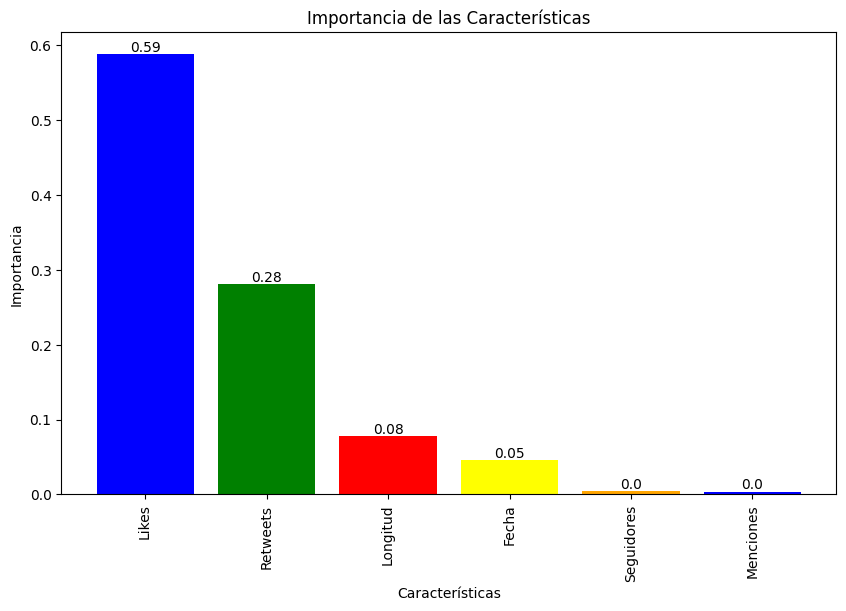

In [49]:
# Graficar la importancia de las caracter√≠sticas con colores y texto
plt.figure(figsize=(10, 6))
bars = plt.bar(feature_importances['Feature'], feature_importances['Importance'], color=colors)
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, round(height, 2), ha='center', va='bottom')
plt.xticks(rotation=90)
plt.xlabel('Caracter√≠sticas')
plt.ylabel('Importancia')
plt.title('Importancia de las Caracter√≠sticas')
plt.show()

Se calcul√≥ la importancia de las caracter√≠sticas utilizando el modelo de √°rbol de decisi√≥n. Las caracter√≠sticas se ordenaron en funci√≥n de su importancia relativa en la toma de decisiones del modelo. Los resultados muestran que Likes es la m√°s importante, seguida de Retweets, Longitud, y as√≠ sucesivamente. Esto proporciona una visi√≥n clara de las caracter√≠sticas que m√°s influyen en la predicci√≥n de la variable objetivo y puede ser √∫til para identificar aspectos clave a considerar en futuros an√°lisis y toma de decisiones

# **Comprobar si una publicaci√≥n tendr√° √©xito**

En este fragmento de c√≥digo se realizan las siguientes acciones:

Se convierte la columna de fecha en caracter√≠sticas num√©ricas: se utilizan las funciones pd.to_datetime y los m√©todos .dt.year, .dt.month y .dt.day para obtener las columnas de a√±o, mes y d√≠a respectivamente.

Se calcula la suma total de retweets y likes mediante la operaci√≥n data['Retweets'] + data['Likes'].

Se calcula el umbral como la media de la suma total utilizando np.mean(suma_total).

Se crea la variable objetivo binaria llamada "Exitosa" utilizando la funci√≥n np.where. Si la suma total es mayor que el umbral, se asigna el valor 1, de lo contrario, se asigna el valor 0.

Los datos se dividen en caracter√≠sticas (X) y la variable objetivo (y).

Se crea y entrena un modelo de √°rbol de decisiones utilizando DecisionTreeClassifier() y model.fit(X, y).

Se crea un nuevo DataFrame llamado nueva_publicacion que contiene los datos de una nueva publicaci√≥n a predecir. Se realiza el preprocesamiento de la fecha de la misma manera que se hizo para los datos originales.

Se seleccionan las columnas correspondientes de nueva_publicacion y se realiza la predicci√≥n de √©xito de la publicaci√≥n utilizando model.predict(nueva_publicacion).

Finalmente, se imprime el resultado de la predicci√≥n indicando si la publicaci√≥n tendr√° √©xito o no.

In [50]:
# Convertir la columna de fecha a caracter√≠sticas num√©ricas
data['Fecha'] = pd.to_datetime(data['Fecha'])
data['A√±o'] = data['Fecha'].dt.year
data['Mes'] = data['Fecha'].dt.month
data['D√≠a'] = data['Fecha'].dt.day

In [51]:
# Obtener la suma total de retweets y likes
suma_total = data['Retweets'] + data['Likes']

# Calcular el umbral como la media de la suma total
umbral = np.mean(suma_total)

# Crear la variable objetivo binaria
data['Exitosa'] = np.where(suma_total > umbral, 1, 0)

# Dividir los datos en caracter√≠sticas y variable objetivo
X = data[['A√±o', 'Mes', 'D√≠a', 'Likes', 'Retweets', 'Longitud', 'Seguidores','Menciones']]  # Reemplaza los nombres de las columnas con tus propias caracter√≠sticas
y = data['Exitosa']  # Reemplaza 'Aceptacion' con el nombre de tu columna objetivo


In [52]:
# Crear el modelo de √°rbol de decisiones
model = DecisionTreeClassifier()
model.fit(X, y)

DecisionTreeClassifier()

In [53]:
# Datos de una nueva publicaci√≥n a predecir
nueva_publicacion = pd.DataFrame({'Fecha': ['2023-11-25'], 'Likes': [800], 'Retweets': [900], 'Longitud': [40], 'Seguidores': [200000], 'Menciones': [2000]})
nueva_publicacion['Fecha'] = pd.to_datetime(nueva_publicacion['Fecha'])
nueva_publicacion['A√±o'] = nueva_publicacion['Fecha'].dt.year
nueva_publicacion['Mes'] = nueva_publicacion['Fecha'].dt.month
nueva_publicacion['D√≠a'] = nueva_publicacion['Fecha'].dt.day
nueva_publicacion = nueva_publicacion[['A√±o', 'Mes', 'D√≠a', 'Likes', 'Retweets', 'Longitud', 'Seguidores','Menciones']]


In [54]:
# Realizar la predicci√≥n de √©xito de la nueva publicaci√≥n
prediccion = model.predict(nueva_publicacion)

In [55]:
# Imprimir la predicci√≥n
if prediccion[0] == 1:
    print("La publicaci√≥n tendr√° √©xito.")
else:
    print("La publicaci√≥n no tendr√° √©xito.")

La publicaci√≥n tendr√° √©xito.


Se implement√≥ un modelo de √°rbol de decisiones para predecir el √©xito de las publicaciones. Se utilizaron caracter√≠sticas como el a√±o, mes, d√≠a, likes, retweets, longitud del contenido, seguidores y menciones. Los resultados mostraron que una nueva publicaci√≥n tendr√° √©xito si se predice con el valor 1. Esto brinda una herramienta √∫til para evaluar el potencial de √©xito de las publicaciones y tomar decisiones informadas sobre las estrategias de publicaci√≥n.